# Worksheet 12

Name:  John Salloum
UID: U13233738

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Yes
2. No
3. Yes
4. No

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Split it 80 20 between test ad train data sets, that way you can train it on the training set and test for bias and variance on the testing set to compare it.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting: High mse for bith training and testing sets, meaning we have no corrrelations between predictors

Overfitting: Havig a low mse on the training set, but a high mse on the testing set since the modle is biased towards the data seen in the training set.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

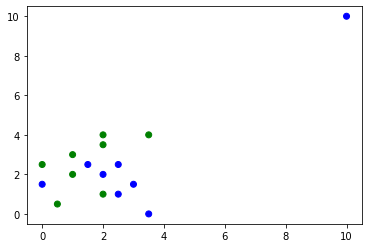

In [3]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yup, there is one point that is at 10,10

In [4]:
data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1],
}

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Potentially any points that include 0, as well as our previously mentioned outlier

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

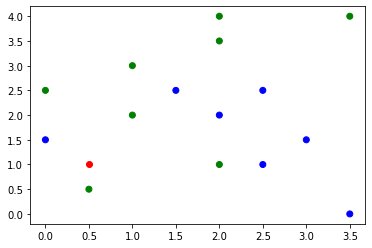

In [5]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.scatter([0.5], [1], color=colors[2])
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

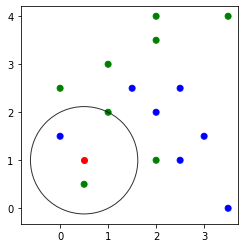

In [32]:
from scipy.spatial import distance

def n_closest_to(example, n):
    distances = []
    for i in range(len(data["Attribute A"])):
        data_point = (data["Attribute A"][i], data["Attribute B"][i], data["Class"][i])
        dist = distance.euclidean(example, (data_point[0], data_point[1]))
        distances.append((i, dist))
    distances.sort(key=lambda x: x[1])
    closest_indices = [x[0] for x in distances[:n]]
    closest_points = [(data["Attribute A"][i], data["Attribute B"][i], data["Class"][i]) for i in closest_indices]
    return closest_points


location = ( 0.5 , 1 )
n = 3
closest_points = n_closest_to(location, n)
radius = distance.euclidean(location, closest_points[n - 1][:2])
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter([0.5], [1], color=colors[2])
#axes.scatter(*zip(*closest_points), color='pink')  # Unpack and plot x, y coordinates
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [34]:
def majority(points):
    class_counts = {}
    default_class = 0 
    for point in points:
        _, _, point_class = point
        class_counts[point_class] = class_counts.get(point_class, 0) + 1

    max_count = 0
    majority_class = default_class
    for point_class, count in class_counts.items():
        if count > max_count:
            max_count = count
            majority_class = point_class
        elif count == max_count:
            majority_class = default_class

    return majority_class


print("Majority class:", majority(closest_points))

Majority class: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [36]:
count = 0
total_points = len(data["Attribute A"])
for i in range(total_points):
    test_point = (data["Attribute A"][i], data["Attribute B"][i])
    actual_class = data["Class"][i]
    training_set = [(data["Attribute A"][j], data["Attribute B"][j], data["Class"][j]) for j in range(total_points) if j != i]
    prediction = majority(n_closest_to(test_point, n))
    
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count/total_points)

overall accuracy =  0.8


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [39]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml(name='mnist_784')

sample_size = 1000  
sample_data, _, sample_target, _ = train_test_split(mnist.data, mnist.target, train_size=sample_size, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(sample_data, sample_target, test_size=0.2, random_state=1)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (800, 784)
Testing data shape: (200, 784)


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

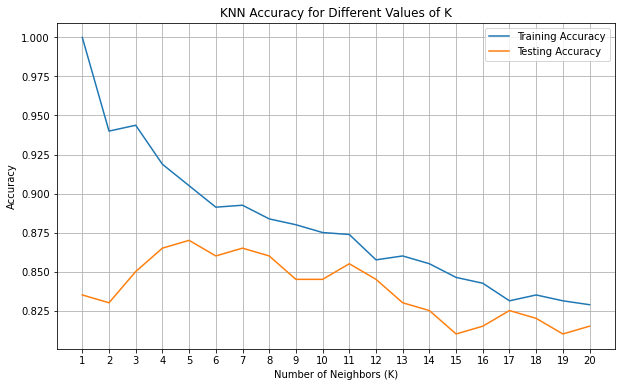

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize empty lists for accuracy
train_accuracies = []
test_accuracies = []

# Our range of 1 to 20
k_values = range(1, 21)

# Train a KNN classifier for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_preds = knn.predict(X_train)
    test_preds = knn.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy')
plt.plot(k_values, test_accuracies, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.legend()
plt.xticks(np.arange(1, 21, step=1))
plt.grid(True)
plt.show()



c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

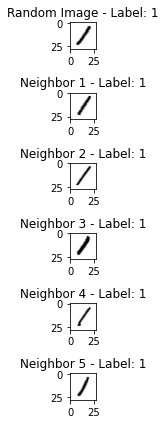

In [42]:
import random

best_k = k_values[np.argmax(test_accuracies)]

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# USe random import to select image from random
random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]
random_label = y_test[random_index]

distances, indices = best_knn.kneighbors([random_image], n_neighbors=best_k)

# Plot the selected image alongside its K nearest neighbors
plt.figure(figsize=(10, 6))
plt.subplot(best_k + 1, 1, 1)
plt.imshow(random_image.reshape(28, 28), cmap='binary')
plt.title('Random Image - Label: ' + str(random_label))

for i in range(best_k):
    plt.subplot(best_k + 1, 1, i + 2)
    neighbor_index = indices[0][i]
    neighbor_image = X_train[neighbor_index]
    neighbor_label = y_train[neighbor_index]
    plt.imshow(neighbor_image.reshape(28, 28), cmap='binary')
    plt.title('Neighbor ' + str(i + 1) + ' - Label: ' + str(neighbor_label))

plt.tight_layout()
plt.show()


d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [67]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=0.72)  

model = make_pipeline(pca, KNeighborsClassifier())

model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Training Accuracy (after PCA):", train_accuracy)
print("Testing Accuracy (after PCA):", test_accuracy)

Training Accuracy (after PCA): 0.93
Testing Accuracy (after PCA): 0.9


Here I chose to reduce the dimensionality to keep about 72 percent of the information using the PCA import to do the work for me. Truth be told i tested between 70 and 80 percent and found 72 to perform the best. This makes sense as we keep just under 3/4 of the origional data, so any npise that was reduced helps to imrpove the test accuracy from .86 (Our max from the graph) to .9.

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

In [ ]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

In [ ]:
# Since age has missing values, this is needed to SIChild is not of type NAN
from sklearn.impute import SimpleImputer

# Handle missing values in the Age column
imputer = SimpleImputer(strategy='mean')
train_data['Age'] = imputer.fit_transform(train_data[['Age']])
test_data['Age'] = imputer.transform(test_data[['Age']])

# For men, It was believed married men would sacrafice themselves for their families. So this looks to see of
# someone was a single man
train_data['IsSingleMan'] = ((train_data.Sex == 'male') & (train_data.SibSp == 0)).astype(int)
test_data['IsSingleMan'] = ((test_data.Sex == 'male') & (test_data.SibSp == 0)).astype(int)

# All children under 13, regardless of sex, were allowed to be set to sea. So our second new data 
# Point uses the age category to see if someone was considered a child
train_data['IsChild'] = (train_data['Age'] < 13).astype(int)
test_data['IsChild'] = (test_data['Age'] < 13).astype(int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#features = ["Pclass", "Sex", "SibSp", "Parch"]
features = ["Pclass", "Sex", "SibSp", "Parch", "IsSingleMan", "IsChild"]
X_train = pd.get_dummies(train_data[features])

y_train = train_data["Survived"]

X_test = pd.get_dummies(test_data[features])

knn_model = KNeighborsClassifier(n_neighbors=5)  # Adjust the number of neighbors as needed
knn_model.fit(X_train, y_train)

predictions = knn_model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")